In [1]:
from gensim.models import Word2Vec

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib notebook

# Dane

In [34]:
sentences = [ ]

for i in range(100000):
    start = np.random.randint(0,20)
    finish = start + np.random.randint(1,10)
    sentence = [str(x) for x in range(start,finish)]
    sentences.append(sentence)

# Model

In [3]:
model = Word2Vec(sentences, size=10, window=5, min_count=1)

In [5]:
model.wv['3']

array([-2.0611491, -2.059887 ,  0.3949675,  4.6432686,  1.2640797,
       -0.2244587, -3.099667 , -1.8289101, -2.2051659,  1.4239028],
      dtype=float32)

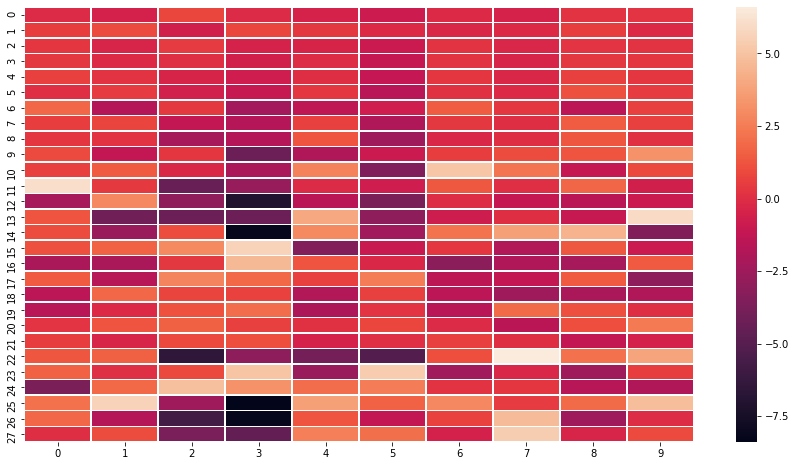

In [18]:
def model_heatmap(model): 
    plt.figure(figsize=(15,8))
    sns.heatmap(model.wv[model.wv.vocab], linewidths=0.5)
model_heatmap(model)

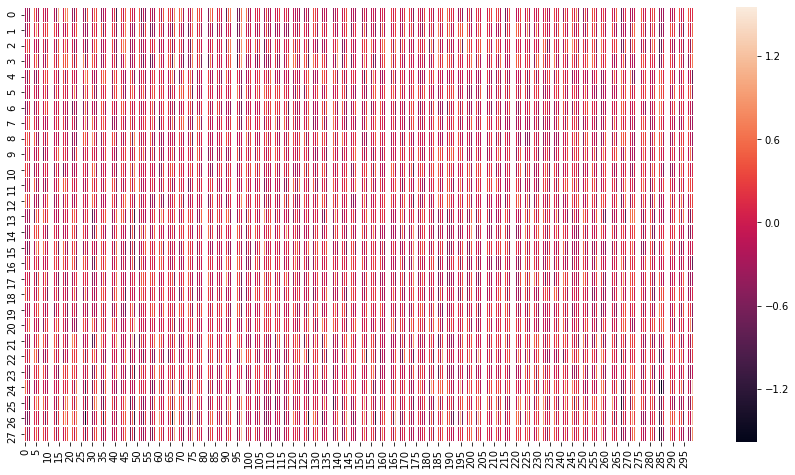

In [35]:
model_heatmap(Word2Vec(sentences, size=300, window=5, min_count=1))

# PCA

In [36]:
def plot_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)

    plt.figure(figsize=(8,5))
    plt.scatter(result[:,0],result[:,1])

    words = list(model.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i,0],result[i,1]))

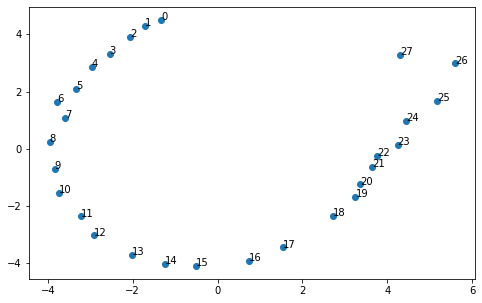

In [37]:
plot_pca(Word2Vec(sentences, size=300, window=5, min_count=1))

# Podobne słowa

In [38]:
model = Word2Vec(sentences, size=300, window=5, min_count=1)

In [39]:
model.wv.most_similar('10', topn=3)

[('9', 0.3576478958129883),
 ('12', 0.34839946031570435),
 ('13', 0.3450402021408081)]

In [41]:
model.wv.most_similar(positive=['10','8'], negative=['6'], topn=3)

[('12', 0.3294796347618103),
 ('13', 0.3154095709323883),
 ('11', 0.2764196991920471)]